In [36]:
#decision tree model
#import libraries
import numpy as np #linear algebra
import pandas as pd # a data preparation and processing or data manipulation
import seaborn as sns # statistical data visualisation
import matplotlib.pyplot as plt #plotting and data visualisation


#import graphviz # visualisation of the leaf nodes

#ML libraries decision trees
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'graphviz'

In [5]:
#load data set
df = pd.read_csv("D:\\learn python\\0A1F2921-1893-47D8-8E4E-F9DE14BB25E6_heart_disease.csv")
df.head() #first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
#number of people with heart disease
#column for target
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [20]:
#percentage of male and female
count_female = len(df.sex==0)
count_male = len(df.sex==1)

#show output
print('percentage of female patients: {0:.2f}%'.format(count_feamle/len(df.sex))*100)

NameError: name 'count_feamle' is not defined

In [12]:
#show the mean
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [13]:
#show for null or nan values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
 # ml for train and test our data
#create logistic regression for that
y = df.target.values
x_data = df.drop(['target'], axis=1)

In [15]:
#split the data for testing 33% and training 67%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y , test_size=0.33 , random_state=42)

In [16]:
#check shape of data for remaining after splitting for test,train 
x_train.shape, x_test.shape

((686, 13), (339, 13))

In [17]:
#check the datatype
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [18]:
#check x_train header
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
866,41,1,2,112,250,0,1,179,0,0.0,2,0,2
749,58,1,1,125,220,0,1,144,0,0.4,1,4,3
212,50,1,0,150,243,0,0,128,0,2.6,1,0,3
79,52,1,1,134,201,0,1,158,0,0.8,2,1,2
148,52,1,3,152,298,1,1,178,0,1.2,1,0,3


In [19]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
#predict the class label for the test data using the decision tree classifier
y_pred_gini = clf_gini.predict(x_test)

from sklearn.metrics import accurancy_score
print('Model accurancy score with criterion gini index: {0:0.4f}'.format(accurancy_score(y_test,y_pred_gini)))

ImportError: cannot import name 'accurancy_score' from 'sklearn.metrics' (D:\anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [29]:
#predict the class label for training data using decision tree classifier
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini  

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [30]:
#print the training set of accurancy score
print('training-set accurancy score: {0:0.4f}'.format(clf_gini.score(x_train, y_train)))

training-set accurancy score: 0.8630


In [31]:
print('testing-set accurancy score: {0:0.4f}'.format(clf_gini.score(x_test, y_test)))

testing-set accurancy score: 0.8112


[Text(0.5, 0.875, 'X[2] <= 0.5\ngini = 0.499\nsamples = 686\nvalue = [328, 358]'),
 Text(0.25, 0.625, 'X[11] <= 0.5\ngini = 0.381\nsamples = 332\nvalue = [247, 85]'),
 Text(0.125, 0.375, 'X[12] <= 2.5\ngini = 0.499\nsamples = 148\nvalue = [71, 77]'),
 Text(0.0625, 0.125, 'gini = 0.344\nsamples = 86\nvalue = [19, 67]'),
 Text(0.1875, 0.125, 'gini = 0.271\nsamples = 62\nvalue = [52, 10]'),
 Text(0.375, 0.375, 'X[3] <= 109.0\ngini = 0.083\nsamples = 184\nvalue = [176, 8]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4375, 0.125, 'gini = 0.045\nsamples = 174\nvalue = [170, 4]'),
 Text(0.75, 0.625, 'X[9] <= 1.95\ngini = 0.353\nsamples = 354\nvalue = [81, 273]'),
 Text(0.625, 0.375, 'X[12] <= 2.5\ngini = 0.283\nsamples = 317\nvalue = [54, 263]'),
 Text(0.5625, 0.125, 'gini = 0.183\nsamples = 245\nvalue = [25, 220]'),
 Text(0.6875, 0.125, 'gini = 0.481\nsamples = 72\nvalue = [29, 43]'),
 Text(0.875, 0.375, 'X[10] <= 0.5\ngini = 0.394\nsamples = 37\nvalue = [27,

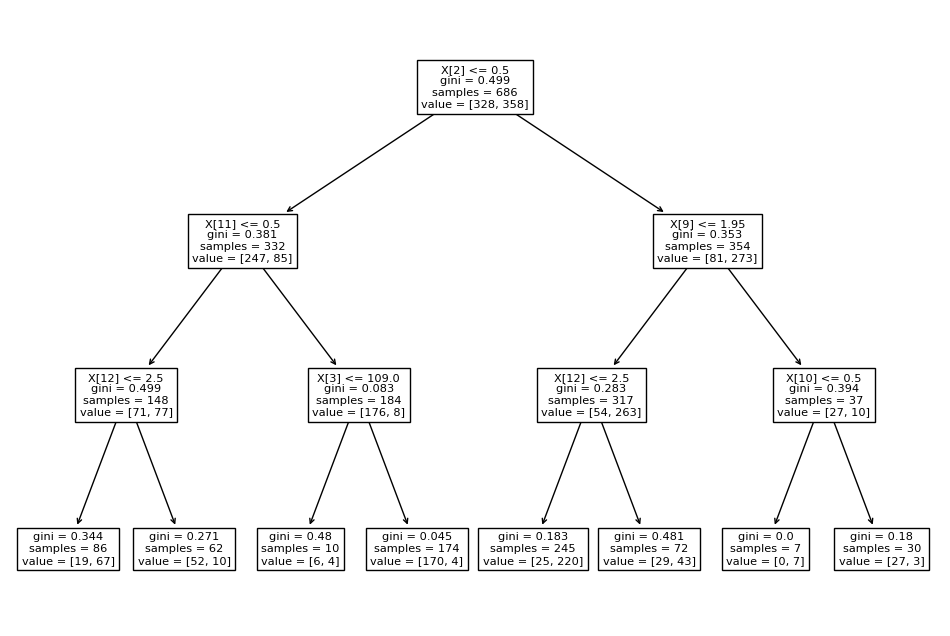

In [35]:
#visualisation 1ST way Decisiontree leaf node
#create figure for width and heigt
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))